In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Formatação do DataFrame

Quando baixamos os dados no site [CNEP](https://portaldatransparencia.gov.br/sancoes/consulta?cadastro=2&ordenarPor=nomeSancionado&direcao=asc) não iremos possuir um conjunto de dados aprensentavel para visualização, sendo necessário a modificação do arquivo de .csv para .txt, sendo assim a leitura não será mais baseada em cima de um dataframe mas sim linha por linha, isso pode, dependendo do arquivo, deixar o processo mais lento para o script em python.

In [2]:
'''
OS dados sobre as empresas no sistema CNEP, devem ser baixados no site 
https://portaldatransparencia.gov.br/entenda-a-gestao-publica/cnep

Os dados baixados em csv, não estarão formatados da maneira correta, estara em uma series
logo baixe e converta para arquivo .txt
'''

'\nOS dados sobre as empresas no sistema CNEP, devem ser baixados no site \nhttps://portaldatransparencia.gov.br/entenda-a-gestao-publica/cnep\n\nOs dados baixados em csv, não estarão formatados da maneira correta, estara em uma series\nlogo baixe e converta para arquivo .txt\n'

In [6]:
#data_bruto = pd.read_csv("sancoes.csv") #-> o arquivo não pode ser  lido como dataset talvez pelo fato de não possuir divisões, 
#Uma manira de corrigir foi mudando a extenção do arquivo e escrevendo em txt, vamos ler um arquivo txt e salvar em array assim fica melhor.

In [9]:
#Vamos primeiro inserir o arquivo na lista dos dados brutos e dessa lista vamos transformar em um data base.
dado_bruto = []
with open('sancoes.txt', 'r', encoding='utf-8') as dados: #leitura do arquivo de texto enunciado
    for linha in dados:
        linha_com_aspas = linha.split(";")
        linha_correta = []
        for i in range(len(linha_com_aspas)):
            linha_correta.append(linha_com_aspas[i].replace('"', '')) #Feito para os textos não conterem strings
        dado_bruto.append(linha_correta)


In [18]:
dados = pd.DataFrame(data = dado_bruto[1:], columns = dado_bruto[0]).drop("\n", axis =1) #Temos os dados em formato correto.
dados

,﻿CNPJ/CPF da Pessoa ou Empresa Sancionada,Nome da Pessoa ou Empresa Sancionada,Cadastro,UF sancionado,Nome do Órgão Sancionador,Categoria sanção,Data Publicação,Valor multa,Quantidade
0,14.752.105/0001-01,A & L SERVICE LTDA,CNEP,RS,Controladoria-Geral da União,Multa,22/02/2024,"68.185,31",1
1,14.752.105/0001-01,A & L SERVICE LTDA,CNEP,RS,Controladoria-Geral da União,Publicação extraordinária da decisão condenatória,22/02/2024,Não se aplica,1
2,11.685.502/0001-10,A C CONSTRUCOES E SERVICOS LTDA,CNEP,CE,Empresa Brasileira de Correios e Telégrafos,Multa,27/09/2023,"184.138,94",1
3,22.499.940/0001-00,A G ROSSATO DISTRIBUIDORA ME,CNEP,PR,Prefeitura Municipal de Maringá - PR,Multa,07/06/2021,"6.000,00",1
4,27.602.332/0001-00,A. CHRISTO COMERCIO - ME,CNEP,ES,Secretaria de Estado de Controle e Transparênc...,Multa,19/02/2020,"4.965,70",1
...,...,...,...,...,...,...,...,...,...
1553,26.427.482/0001-54,Ágil Ltda,CNEP,SC,"Instituto Federal de Educação, Ciência e Tecno...",Multa,22/12/2025,"189.040,33",1
1554,26.427.482/0001-54,Ágil Ltda,CNEP,SC,Prefeitura Municipal de Porto Alegre (RS),Multa,15/08/2025,"7.110,28",1
1555,26.427.482/0001-54,Ágil Ltda,CNEP,SC,Prefeitura Municipal de Porto Alegre (RS),Publicação extraordinária da decisão condenatória,15/08/2025,Não se aplica,1
1556,36.892.271/0001-46,ÁPICE CONSTRUTORA INCORPORADORA E IMOBILIÁRIA ...,CNEP,MT,Controladoria Geral do Estado de Mato Grosso,Multa,18/03/2021,"401.262,36",1


In [15]:
#Identificamos as colunas que o nosso dataframe possui, e vamos filtrar aquelas que não são necessárias
colunas = dados.columns

# Tratamento da tabela, limpeza dos dados que não possuem uma "importância" ou que são redundantes

Possuimos as seguintes colunas nno nosso dataframe:
        1) 'CNPJ/CPF da Pessoa ou Empresa Sancionada';
        2) 'Nome da Pessoa ou Empresa Sancionada';
        3) 'Cadastro';
        4) 'UF sancionado';
        5) 'Nome do Órgão Sancionador';
        6) 'Categoria sanção';
        7) 'Data Publicação';
        8) 'Valor multa';
        9) 'Quantidade'.

Existem dados que estão duplicados, ou que possuem o mesmo teor informativo, vamos apagar uma dessas colunas, no caso deixarei a coluna de Nome da Pessoa ou Empresa Sancionada.

A coluna Cadastro só possui uma informação para geral que é CNEP podemos esntão desconsiderar essa coluna

O mesmo vale para a coluna Quantidade


In [16]:
#Correções
dados_sem_CNPJ = dados.drop('﻿CNPJ/CPF da Pessoa ou Empresa Sancionada',axis = 1).copy()
dados_sem_cadastros = dados_sem_CNPJ.drop("Cadastro", axis = 1).copy()
dados_sem_quantidade = dados_sem_cadastros.drop('Quantidade', axis = 1).copy()
data = dados_sem_quantidade.copy()

In [17]:
data

,Nome da Pessoa ou Empresa Sancionada,UF sancionado,Nome do Órgão Sancionador,Categoria sanção,Data Publicação,Valor multa
0,A & L SERVICE LTDA,RS,Controladoria-Geral da União,Multa,22/02/2024,"68.185,31"
1,A & L SERVICE LTDA,RS,Controladoria-Geral da União,Publicação extraordinária da decisão condenatória,22/02/2024,Não se aplica
2,A C CONSTRUCOES E SERVICOS LTDA,CE,Empresa Brasileira de Correios e Telégrafos,Multa,27/09/2023,"184.138,94"
3,A G ROSSATO DISTRIBUIDORA ME,PR,Prefeitura Municipal de Maringá - PR,Multa,07/06/2021,"6.000,00"
4,A. CHRISTO COMERCIO - ME,ES,Secretaria de Estado de Controle e Transparênc...,Multa,19/02/2020,"4.965,70"
...,...,...,...,...,...,...
1553,Ágil Ltda,SC,"Instituto Federal de Educação, Ciência e Tecno...",Multa,22/12/2025,"189.040,33"
1554,Ágil Ltda,SC,Prefeitura Municipal de Porto Alegre (RS),Multa,15/08/2025,"7.110,28"
1555,Ágil Ltda,SC,Prefeitura Municipal de Porto Alegre (RS),Publicação extraordinária da decisão condenatória,15/08/2025,Não se aplica
1556,ÁPICE CONSTRUTORA INCORPORADORA E IMOBILIÁRIA ...,MT,Controladoria Geral do Estado de Mato Grosso,Multa,18/03/2021,"401.262,36"


# Separação dos Munícipios

Temos os seguintes municipios nos nossos dados 
'RS', 'CE', 'PR', 'ES', 'PE', 'MG', 'SP', 'RJ', 'SC', 'DF', 'RN', 'MS', 'BA', 'MT', 'AM', 'AL', 'TO', 'GO', 'PA', 'PI', '-1', 'MA', 'PB', 'SE', 'AP', 'RO'

Para cada múnicipio precisamos criar um dataframe separado vamos fazer isso.

In [20]:
#criação de um dict com todas os data frames de cada muncipio para analise separada.
muni = {dado: municipios for dado, municipios in data.groupby("UF sancionado")}
#Um dict com as seguintes informações {UF_1: DataFramedeUF_1, UF_2: DataFramedeUF_2, UF_3: DataFramedeUF_3, UF_4: DataFramedeUF_4,... }
#Sendo assim Para acessarmos essas UF's precisamos das Keys de cada Região
muni["CE"]

,Nome da Pessoa ou Empresa Sancionada,UF sancionado,Nome do Órgão Sancionador,Categoria sanção,Data Publicação,Valor multa
2,A C CONSTRUCOES E SERVICOS LTDA,CE,Empresa Brasileira de Correios e Telégrafos,Multa,27/09/2023,"184.138,94"
120,ASSOCIAÇÃO NACIONAL DE ASSISTÊNCIA AOS FUNCION...,CE,Secretaria de Estado de Controle e Transparênc...,Publicação extraordinária da decisão condenatória,12/12/2024,Não se aplica
177,BLT LOGISTICA LTDA,CE,Petróleo Brasileiro S.A.,Publicação extraordinária da decisão condenatória,01/03/2024,Não se aplica
675,INOVA SERVICOS DE MAO DE OBRA EIRELI,CE,AGÊNCIA NACIONAL DE TRANSPORTES TERRESTRES,Multa,03/08/2020,"5.749.967,00"
759,JK TERCEIRIZACAO DE SERVICOS E COMERCIO EIRELI...,CE,Agência Nacional de Vigilância Sanitária,Multa,13/05/2020,"6.000,00"
869,LOC MAXX LOCACAO DE MAO DE OBRA E SERVICOS TEM...,CE,Ministério da Gestão e da Inovação em Serviços...,Multa,06/09/2023,"13.214,34"
897,M&M CONSTRUÇÃO LTDA,CE,Justiça Federal da Paraíba,Suspensão/Interdição das atividades com prazo ...,Sem informação,Não se aplica
907,MAKRO MOVEIS E EQUIPAMENTOS MODULADOS LTDA,CE,Empresa Brasileira de Correios e Telégrafos,Multa,26/09/2024,"274.154,78"
908,MAKRO MOVEIS E EQUIPAMENTOS MODULADOS LTDA,CE,Empresa Brasileira de Correios e Telégrafos,Publicação extraordinária da decisão condenatória,26/09/2024,Não se aplica
1336,SOS GAS LTDA - ME,CE,Empresa Brasileira de Correios e Telégrafos,Multa,10/09/2018,"37.227,67"


Com o dict feito podemos acessar os dados de cada municipio separadamente, e podemos agora responder duvidas que envolvem os estados separadamente.


In [10]:
#Vamos criar as funções que nos retornarão os dados que explicam e auxiliam nas nossas duvidas.
lista_muni = list(muni.keys())
#essa lista vai nos ajudar a percorrer o dict a cada procura de informação
print(lista_muni)

['-1', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RS', 'SC', 'SE', 'SP', 'TO']


# O que podemos responder para cada Municipio?

1) Quantas empresas foram acusadas de corrupção em cada múnicipio? -> Um data frame com o número de empresas por região
2) Quais empresas foram acusadas de corrupção? -> uma lista das empresas presentes.
3) Quantos tipos de sanções foram vistas naquele múnicipio? - uma lista de sanções por municipios
4) Qual foi a maior Multa aplicada em Valor? -> valor único em cada múnicipio
5) Qual empresa teve a aplicação da maior Multa? 

Para responder as perguntas vamos utilizar funções para cada pegunta.

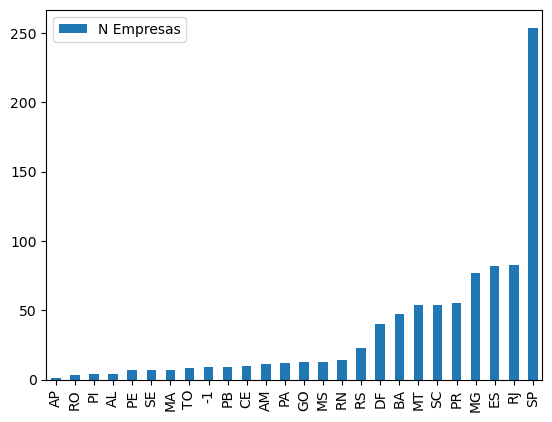

In [23]:
def TotaldeEmpresaAcusada(muni, lista_muni): 
    #Recebe o Dicionario com os múnicipios e a lista com os nomes do municipio e retorna um dataframe
    totalAcusadoRegiao = []
    for i in range(len(lista_muni)):
        dataFrame = muni[lista_muni[i]] 
        n_empresa = dataFrame["Nome da Pessoa ou Empresa Sancionada"].nunique()
        totalAcusadoRegiao.append(n_empresa)
    dado_Total = pd.DataFrame(data= totalAcusadoRegiao , index = lista_muni, columns = ["N Empresas"] ).sort_values(by ="N Empresas")
    return dado_Total

Total_e
Total_empresas = TotaldeEmpresaAcusada(muni, lista_muni)
Total_empresas.plot.bar() #FAz o grafico de barra do número de empresas presente
plt.show()

In [154]:
def TipoSancoesMuni(dados, lista_muni):
    return

In [155]:
def MaiorMulta(dados, lista_muni):
    return

In [156]:
def EmpresaMaiorMulta(dados, lista_muni):
    return